In [5]:
import pandas as pd
import numpy as np
!pip install -U spacy
!python -m spacy download en_core_web_sm
import spacy
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import confusion_matrix,recall_score,f1_score,precision_score
import math

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 393.8 kB/s eta 0:00:33
     --------------------------------------- 0.1/12.8 MB 657.6 kB/s eta 0:00:20
     --------------------------------------- 0.1/12.8 MB 656.4 kB/s eta 0:00:20
     --------------------------------------- 0.1/12.8 MB 655.8 kB/s eta 0:00:20
      -------------------------------------- 0.2/12.8 MB 655.4 kB/s eta 0:00:20
      -------------------------------------- 0.2/12.8 MB 689.2 kB/s eta 0:00:19
      -------------------------------------- 0.2/12.8 MB 718.0 kB/s eta 0:00:18
      -------------------------------------- 0.3/12.8 MB 628.5 kB/s eta 0:00:20
      -------------------------------------- 0.3/12.8 MB 610.3 kB/s eta 0:00:21
     - ------------------------------------- 0.3/12.8 MB 677.0 kB/s eta 0:00:19
     - ------------------------------------- 0.4/12.8 MB

In [6]:
df = pd.read_csv(r"C:\Users\rohin\Downloads\FinalBalancedDataset.csv\FinalBalancedDataset.csv")

In [7]:
len(df)

56745

In [8]:
df.shape

(56745, 3)

In [9]:
df.head()

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [10]:
df.drop(['Unnamed: 0'], axis=1)

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,1,"you've gone and broke the wrong heart baby, an..."
56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,1,youu got wild bitches tellin you lies


In [11]:
import string
    
def remove_punc_dig(text : str):
    '''
    text : str 
    This function will remove all the punctuations and digits from the "text"
    '''
    to_remove = string.punctuation + string.digits
    cur_text = ""
    for i in range(len(text)):
        if text[i] in to_remove:
            cur_text += " "
        else:
            cur_text += text[i].lower()
    cur_text = " ".join(cur_text.split())
    return cur_text

In [12]:
df['cur_tweet'] = df['tweet'].apply(lambda x:remove_punc_dig(x))

In [13]:
df.head()

,Unnamed: 0,Toxicity,tweet,cur_tweet
0,0,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so ...
1,1,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can t use c...
2,2,0,bihday your majesty,bihday your majesty
3,3,0,#model i love u take with u all the time in ...,model i love u take with u all the time in urð...
4,4,0,factsguide: society now #motivation,factsguide society now motivation


In [14]:
df.drop(['tweet'], axis=1)

,Unnamed: 0,Toxicity,cur_tweet
0,0,0,user when a father is dysfunctional and is so ...
1,1,0,user user thanks for lyft credit i can t use c...
2,2,0,bihday your majesty
3,3,0,model i love u take with u all the time in urð...
4,4,0,factsguide society now motivation
...,...,...,...
56740,56740,1,you s a muthaf in lie lifeasking pearls corey ...
56741,56741,1,you ve gone and broke the wrong heart baby and...
56742,56742,1,young buck wanna eat dat nigguh like i aint fu...
56743,56743,1,youu got wild bitches tellin you lies


In [15]:
from spacy.lang.en.stop_words import STOP_WORDS

In [16]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [17]:
def remove_stop_words(text: str):
    '''
    text : str
    This function will remove stop words like I,my,myself etc
    '''
    filtered_sentence = []
    for word in text.split(' '):
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word) 
    return " ".join(filtered_sentence)

In [18]:
df['filtered_cur_tweet'] = df['cur_tweet'].apply(lambda x : remove_stop_words(x))

In [19]:
df.drop(['cur_tweet'], axis=1)

,Unnamed: 0,Toxicity,tweet,filtered_cur_tweet
0,0,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drags kids d...
1,1,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit t use cause don t...
2,2,0,bihday your majesty,bihday majesty
3,3,0,#model i love u take with u all the time in ...,model love u u time urð± ðððð ð...
4,4,0,factsguide: society now #motivation,factsguide society motivation
...,...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,s muthaf lie lifeasking pearls corey emanuel r...
56741,56741,1,"you've gone and broke the wrong heart baby, an...",ve gone broke wrong heart baby drove redneck c...
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like aint fuck...
56743,56743,1,youu got wild bitches tellin you lies,youu got wild bitches tellin lies


In [20]:
def lemmatizer(text : str):
    '''
    text : str
    Applying lemmatization for all words of "text"
    '''
    return " ".join([token.lemma_ for token in nlp(text)])

In [21]:
df['lemma_cur_tweet'] = df['filtered_cur_tweet'].apply(lambda x : lemmatizer(x))

In [22]:
df.drop(['filtered_cur_tweet'], axis=1)

,Unnamed: 0,Toxicity,tweet,cur_tweet,lemma_cur_tweet
0,0,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so ...,user father dysfunctional selfish drag kid dys...
1,1,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can t use c...,user user thank lyft credit t use cause don t ...
2,2,0,bihday your majesty,bihday your majesty,bihday majesty
3,3,0,#model i love u take with u all the time in ...,model i love u take with u all the time in urð...,model love u u time urð± ðððð ð...
4,4,0,factsguide: society now #motivation,factsguide society now motivation,factsguide society motivation
...,...,...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,you s a muthaf in lie lifeasking pearls corey ...,s muthaf lie lifeaske pearls corey emanuel rig...
56741,56741,1,"you've gone and broke the wrong heart baby, an...",you ve gone and broke the wrong heart baby and...,ve go break wrong heart baby drive redneck crazy
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like i aint fu...,young buck wanna eat dat nigguh like be not fu...
56743,56743,1,youu got wild bitches tellin you lies,youu got wild bitches tellin you lies,youu get wild bitch tellin lie


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [24]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
bow = bow_vectorizer.fit_transform(df['lemma_cur_tweet'])
bow.shape

(56745, 20056)

In [25]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['lemma_cur_tweet'])
tfidf.shape

(56745, 20056)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [27]:
X = df.loc[:,'lemma_cur_tweet']
Y = df['Toxicity']

In [28]:
X_train, X_test,y_train, y_test = train_test_split(X,Y, random_state=100, test_size=0.20)

In [29]:
X_train, X_test,y_train, y_test = train_test_split(bow,df['Toxicity'],random_state=100,test_size = 0.20)

In [30]:
model_1 = DecisionTreeClassifier()
model_1.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
train_pred = model_1.predict(X_train)
test_pred = model_1.predict(X_test)

In [32]:
predictions = model_1.predict(X_test)
predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6565
           1       0.92      0.92      0.92      4784

    accuracy                           0.93     11349
   macro avg       0.93      0.93      0.93     11349
weighted avg       0.93      0.93      0.93     11349



In [34]:
print(confusion_matrix(y_test,predictions))

[[6198  367]
 [ 398 4386]]


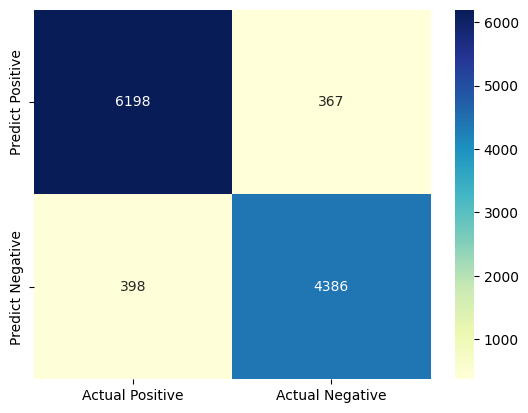

In [92]:
import seaborn as sns
cm = confusion_matrix(y_test,test_pred)
cm_matrix = pd.DataFrame(data=cm,columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [35]:
model_1.score(X_train,y_train),model_1.score(X_test,y_test)

(0.9996695744118425, 0.9325931800158604)

In [36]:
model_2 = RandomForestClassifier()
model_2.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
predictions_1 = model_2.predict(X_test)
predictions_1

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [38]:
print(classification_report(y_test,predictions_1))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6565
           1       0.94      0.92      0.93      4784

    accuracy                           0.94     11349
   macro avg       0.94      0.94      0.94     11349
weighted avg       0.94      0.94      0.94     11349



In [39]:
print(confusion_matrix(y_test,predictions_1))

[[6298  267]
 [ 384 4400]]


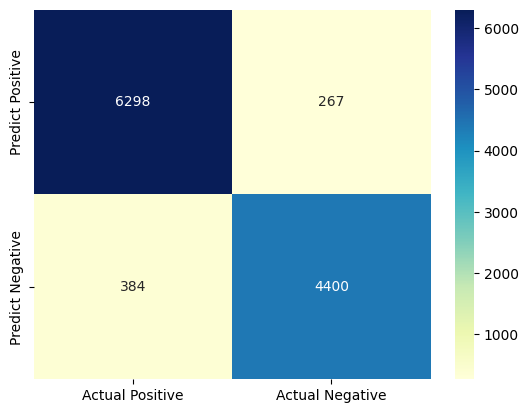

In [94]:
import seaborn as sns
cm = confusion_matrix(y_test,predictions_1)
cm_matrix = pd.DataFrame(data=cm,columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [40]:
model_2.score(X_train,y_train),model_2.score(X_test,y_test)

(0.9996695744118425, 0.9426381178958498)

In [41]:
model_3 = KNeighborsClassifier(n_neighbors=2)
model_3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [42]:
predictions_2 = model_3.predict(X_test)
predictions_2

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [43]:
print(classification_report(y_test,predictions_2))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6565
           1       0.97      0.78      0.86      4784

    accuracy                           0.90     11349
   macro avg       0.91      0.88      0.89     11349
weighted avg       0.90      0.90      0.89     11349



In [44]:
print(confusion_matrix(y_test,predictions_2))

[[6450  115]
 [1071 3713]]


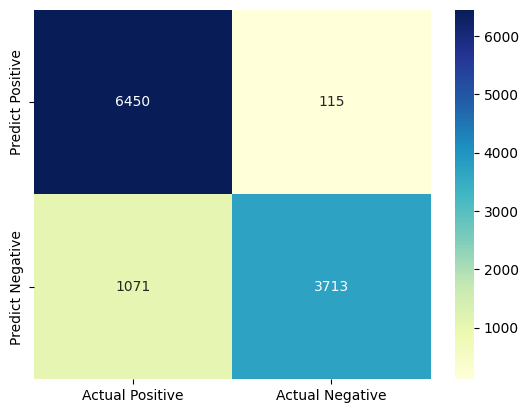

In [95]:
import seaborn as sns
cm = confusion_matrix(y_test,predictions_2)
cm_matrix = pd.DataFrame(data=cm,columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [45]:
model_3.score(X_train,y_train),model_3.score(X_test,y_test)

(0.9352586130936646, 0.8954974006520399)

In [46]:
from sklearn.svm import LinearSVC
from sklearn import svm
model_4 = svm.LinearSVC()
model_4.fit(X_train,y_train)

C:\Users\rohin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\rohin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [47]:
predictions_3 = model_4.predict(X_test)
predictions_3

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [48]:
print(classification_report(y_test,predictions_3))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6565
           1       0.94      0.92      0.93      4784

    accuracy                           0.94     11349
   macro avg       0.94      0.94      0.94     11349
weighted avg       0.94      0.94      0.94     11349



In [49]:
print(confusion_matrix(y_test,predictions_3))

[[6292  273]
 [ 395 4389]]


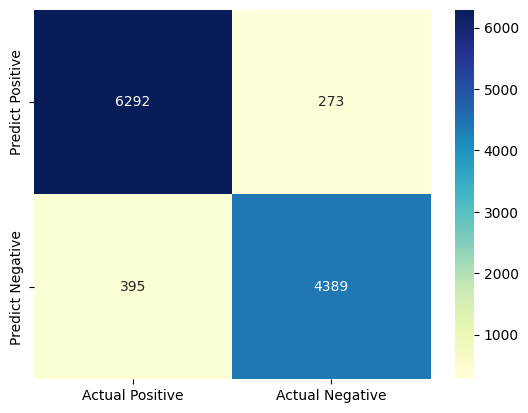

In [96]:
import seaborn as sns
cm = confusion_matrix(y_test,predictions_3)
cm_matrix = pd.DataFrame(data=cm,columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [50]:
model_4.score(X_train,y_train),model_4.score(X_test,y_test)

(0.9922900696096573, 0.941140188562869)

In [51]:
from sklearn.naive_bayes import MultinomialNB
model_5 = MultinomialNB()
model_5.fit(X_train,y_train)

MultinomialNB()

In [52]:
predictions_4 = model_5.predict(X_test)
predictions_4

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [53]:
print(classification_report(y_test,predictions_4))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      6565
           1       0.88      0.94      0.91      4784

    accuracy                           0.92     11349
   macro avg       0.92      0.92      0.92     11349
weighted avg       0.92      0.92      0.92     11349



In [54]:
print(confusion_matrix(y_test,predictions_4))

[[5949  616]
 [ 302 4482]]


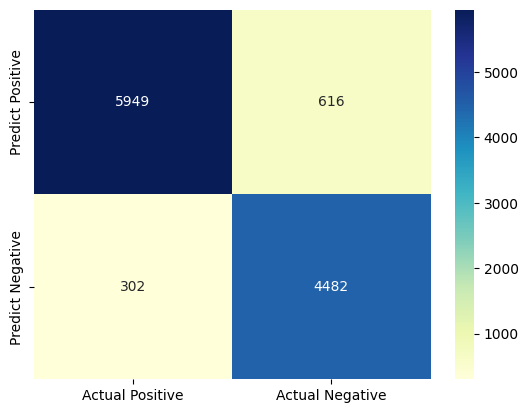

In [97]:
import seaborn as sns
cm = confusion_matrix(y_test,predictions_4)
cm_matrix = pd.DataFrame(data=cm,columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [55]:
model_5.score(X_train,y_train),model_5.score(X_test,y_test)

(0.9369988545246277, 0.9191118160190325)

In [59]:
print(f"Accuracy score: {accuracy_score(y_test, predictions)}") #Decisiontree

Accuracy score: 0.9325931800158604


In [72]:
print(f"Accuracy score: {accuracy_score(y_test, predictions_1)}") #Randomforest

Accuracy score: 0.9426381178958498


In [73]:
print(f"Accuracy score: {accuracy_score(y_test, predictions_2)}") #Kneigboursclassifier

Accuracy score: 0.8954974006520399


In [74]:
print(f"Accuracy score: {accuracy_score(y_test, predictions_3)}") #Linearsvc

Accuracy score: 0.941140188562869


In [75]:
print(f"Accuracy score: {accuracy_score(y_test, predictions_4)}")  #MultinomialNB

Accuracy score: 0.9191118160190325


In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [81]:
y_scores = model_1.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])   #Decisiontrees

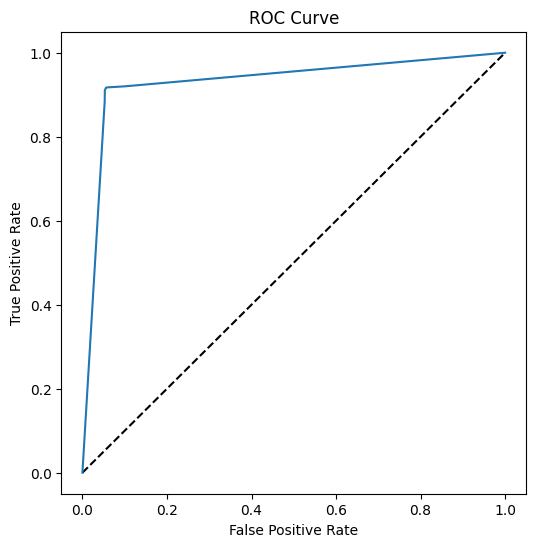

In [82]:
fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [79]:
y_scores = model_2.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])   #Randomforest

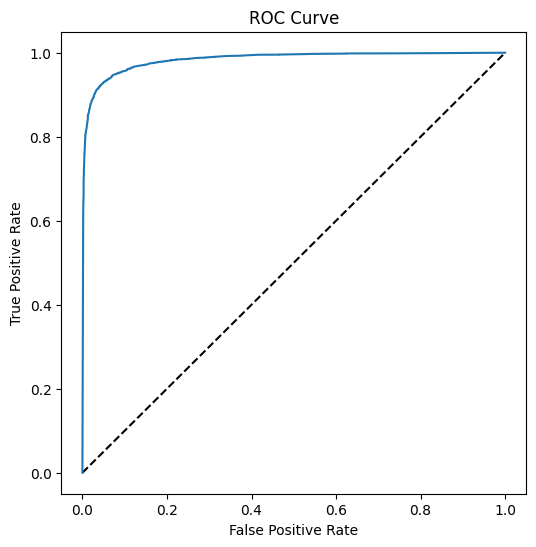

In [80]:
fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [83]:
y_scores = model_3.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])   #KNeighborsclassifier

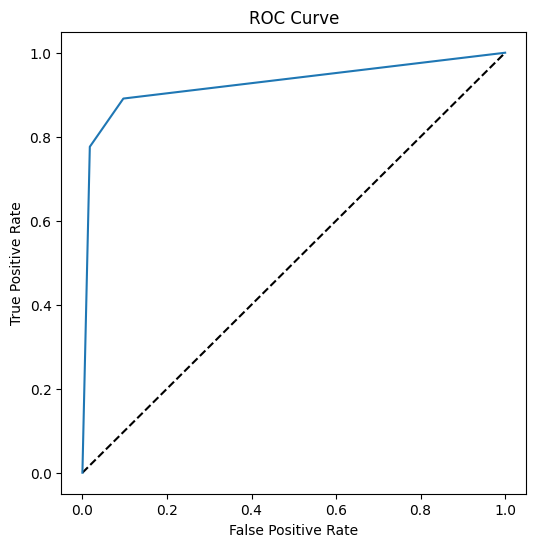

In [84]:
fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [86]:
y_scores = model_5.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])  #MultinomialNB

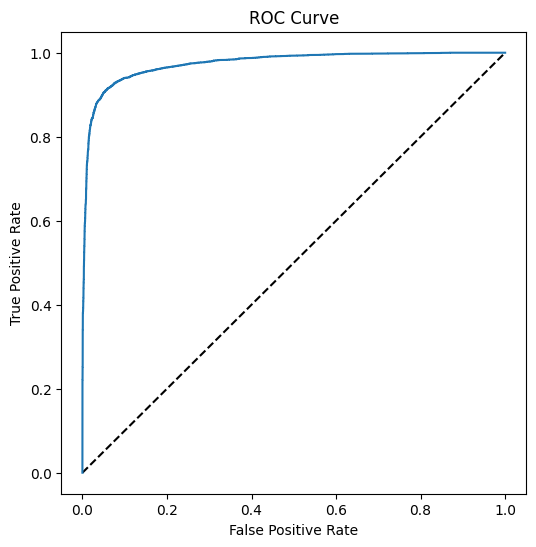

In [87]:
fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()